In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/titanic_train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The dataset contains information about passengers on the Titanic. The columns are as follows:

* `PassengerId`: Unique identifier for each passenger
* `Survived`: Whether the passenger survived or not (0 = No, 1 = Yes)
* `Pclass`: Ticket class (1 = Upper, 2 = Middle, 3 = Lower)
* `Name`: Name of the passenger
* `Sex`: Sex of the passenger
* `Age`: Age of the passenger
* `SibSp`: Number of siblings / spouses aboard the Titanic
* `Parch`: Number of parents / children aboard the Titanic
* `Ticket`: Ticket number
* `Fare`: Passenger fare
* `Cabin`: Cabin number
* `Embarked`: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

The next step is to analyze the data. We'll focus on missing values, outliers, data types, and distributions. We're particularly interested in the target variable, `Survived`, and any features that may be associated with it.

We'll check the overall information about the dataset like - Info and Description of the dataset like mean,stddeviation etc

Let's get started.

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we can see from the output above, the dataset has a total of 891 observations with 11 independent features and 1 dependent variable(`Survived`). There are also features with missing values.

* The 'Age' column has several missing values. We've got only 714 non-null entries out of 891.
* The 'Cabin' column has a large proportion of missing values, with only 204 non-null entries. Given the large number of missing values, the 'Cabin' column may not be particularly useful in its current form for predictive modeling.
* Lastly, the 'Embarked' column also has a few missing value, with 889 non-null entries out of 891.

For the missing 'Age' values, an approach we could take is to fill in the missing values with the median or mean age of the passengers. For the 'Cabin', given the large number of missing values, it might make sense to initially drop this from our analysis or engineer a new feature from it (for instance, whether or not a cabin was assigned). For 'Embarked', we can fill the missing values with the port where most people embarked.

Let's proceed with these steps in our data cleaning process. Also, let's look at some basic descriptive statistics for our dataset.

In [3]:
# Basic Descriptive Statistics

# Median Age
median_age = df['Age'].median()

# Mode of Embarked
mode_embarked = df['Embarked'].mode()[0]

# Fill missing age values with median age
# Fill missing embarked values with mode
# Drop the Cabin column

df_clean = df.fillna({"Age": median_age, "Embarked": mode_embarked})
df_clean.drop('Cabin', axis=1, inplace=True)

# Show basic descriptive statistics

df_clean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now we have a cleaned dataset with no missing values. We have filled the missing values in 'Age' and 'Embarked' columns with respective median and mode. We also dropped the 'Cabin' column due to excessive missing values.

Let's look at some descriptive statistics of our data:

- From the count, we can confirm that missing values have been dealt with, as all columns have the same number of non-null entries.
- The mean survival rate is around 0.38, indicating that less than half of the passengers survived. This will be our baseline for model evaluation - a naive model predicting no survivors would achieve this accuracy.
- The mean age is around 29.3 years, with the youngest passenger being less than a year old and the oldest being 80 years old. This could be an interesting feature to look at in more detail - age may play an important role in survival.
- SibSp and Parch represent the number of siblings/spouses and parents/children aboard. It looks like most passengers were traveling alone, but there are some with up to 8 siblings/spouses or 6 parents/children. 
- Fare also varies greatly, with the majority of passengers paying less than $32 but some paying up to $512.

Before we proceed with modeling, it would be beneficial to perform some exploratory data analysis (EDA) to better understand the relationships in our data. I think a good starting point would be to explore the relationships between our target variable 'Survived' and other features. Let's start with the 'Sex' and 'Pclass' features, since it's often said that the 'women and children first' rule was applied and that the 'Pclass' often is a strong indicator of socioeconomic status.

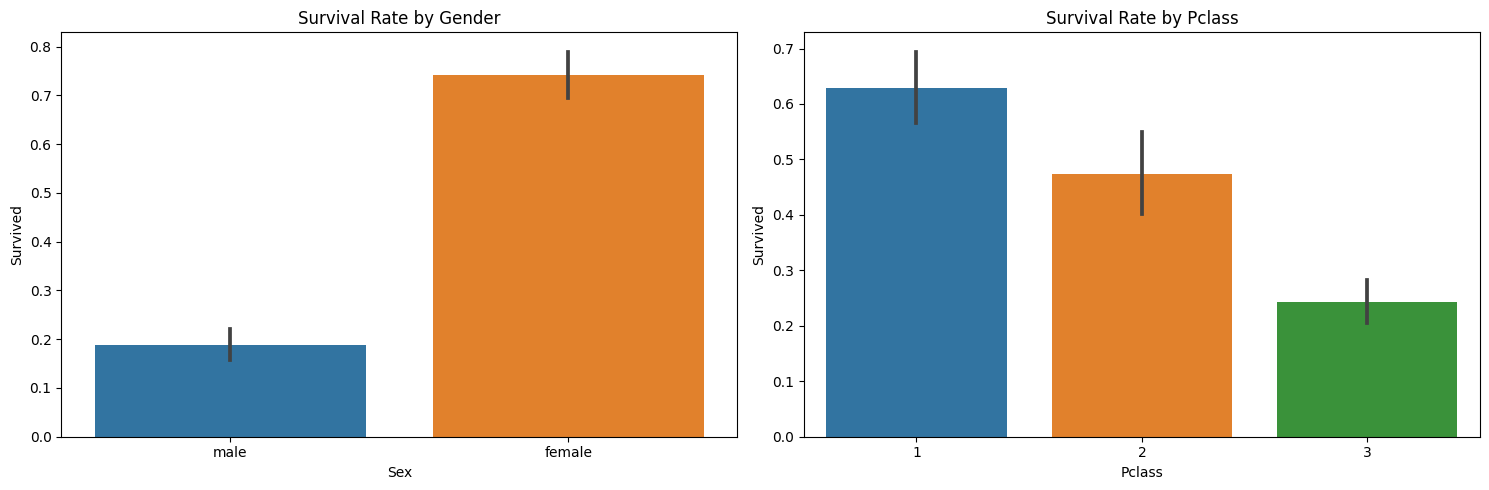

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(15, 5))

# survival rate by Sex
plt.subplot(1,2,1)
sns.barplot(x = 'Sex', y = 'Survived', data = df_clean)
plt.title('Survival Rate by Gender')

# Survival rate by Pclass
plt.subplot(1,2,2)
sns.barplot(x = 'Pclass', y = 'Survived', data = df_clean, )
plt.title('Survival Rate by Pclass')

plt.tight_layout()
plt.show()

From the bar plots above, we see some interesting patterns:

- *Survival Rate by Sex*: Females have a much higher survival rate than males. This implies that the 'Sex' feature likely will be important in our predictive models and could partially describe the 'women and children first' policy.
- *Survival Rate by Pclass*: Passengers in the first class (Pclass=1) have a higher survival rate than the other classes. This suggests that socioeconomic status played a significant role in survival on the Titanic.

Let's now implement a machine learning model to predict survival on the Titanic. As a start, let's build a Logistic Regression model - it's a good baseline for binary classification problems. We'll use 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', and 'Fare' as features.

Before we build our model, we need to encode the 'Sex' categorical feature as a numerical variable. We will apply one-hot encoding to 'Sex' and 'Embarked'.Also, we have to split our data into training and testing portions for our model. Let's perform these steps.